In [6]:
import yfinance as yf

# Define Tesla ticker and download stock data
tesla = yf.Ticker("TSLA")
tesla_stock = tesla.history(period="max")

# Display the first few rows
print(tesla_stock.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [7]:
# I had to do more than the example because the page wouldn't load properly :-)
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO  # Make sure this import is present
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

# Set up Selenium WebDriver (Chrome in this example)
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
driver.get(url)

# Wait for JavaScript to load the content
time.sleep(5)

# Get the rendered HTML
rendered_html = driver.page_source
driver.quit()

# Parse with BeautifulSoup
soup = BeautifulSoup(rendered_html, 'html.parser')
table = soup.find('table', class_='historical_data_table')
if table:
    df = pd.read_html(StringIO(str(table)), flavor='lxml')[0]
    print(df.head())
else:
    print("Table not found.")

   Tesla Annual Revenue (Millions of US $)  \
0                                     2024   
1                                     2023   
2                                     2022   
3                                     2021   
4                                     2020   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $97,690  
1                                   $96,773  
2                                   $81,462  
3                                   $53,823  
4                                   $31,536  


In [8]:
import yfinance as yf

# Define GameStop ticker and download stock data
gamestop = yf.Ticker("GME")
gamestop_stock = gamestop.history(period="max")

# Display the first few rows
print(gamestop_stock.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO 
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time


driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
# Update URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
driver.get(url)

# Wait for JavaScript to load the content
time.sleep(5)

# Get the rendered HTML
rendered_html = driver.page_source
driver.quit()

# Parse with BeautifulSoup
soup = BeautifulSoup(rendered_html, 'html.parser')
table = soup.find('table', class_='historical_data_table')
if table:
    df = pd.read_html(StringIO(str(table)), flavor='lxml')[0]
    print(df.head())
else:
    print("Table not found.")

   GameStop Annual Revenue (Millions of US $)  \
0                                        2025   
1                                        2024   
2                                        2023   
3                                        2022   
4                                        2021   

  GameStop Annual Revenue (Millions of US $).1  
0                                       $3,823  
1                                       $5,273  
2                                       $5,927  
3                                       $6,011  
4                                       $5,090  


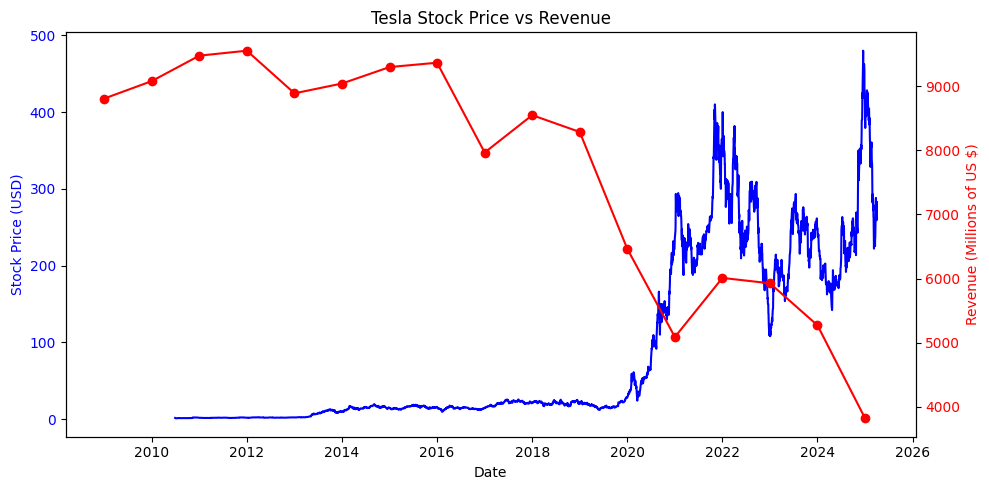

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Tesla stock price on primary y-axis
ax1.plot(tesla_stock.index, tesla_stock['Close'], color='blue', label='Stock Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Clean the Tesla revenue data
tesla_revenue_cleaned = df.copy()
tesla_revenue_cleaned.columns = ['Year', 'Revenue']
tesla_revenue_cleaned['Revenue'] = tesla_revenue_cleaned['Revenue'].replace(r'[\$,]', '', regex=True).astype(float)

# Create a second y-axis for revenue data
ax2 = ax1.twinx()

# Plot revenue data (convert Year to datetime for consistency if needed)
years = pd.to_datetime(tesla_revenue_cleaned['Year'], format='%Y')
ax2.plot(years, tesla_revenue_cleaned['Revenue'], color='red', marker='o', label='Revenue')
ax2.set_ylabel("Revenue (Millions of US $)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Tesla Stock Price vs Revenue")
fig.tight_layout()
plt.show()

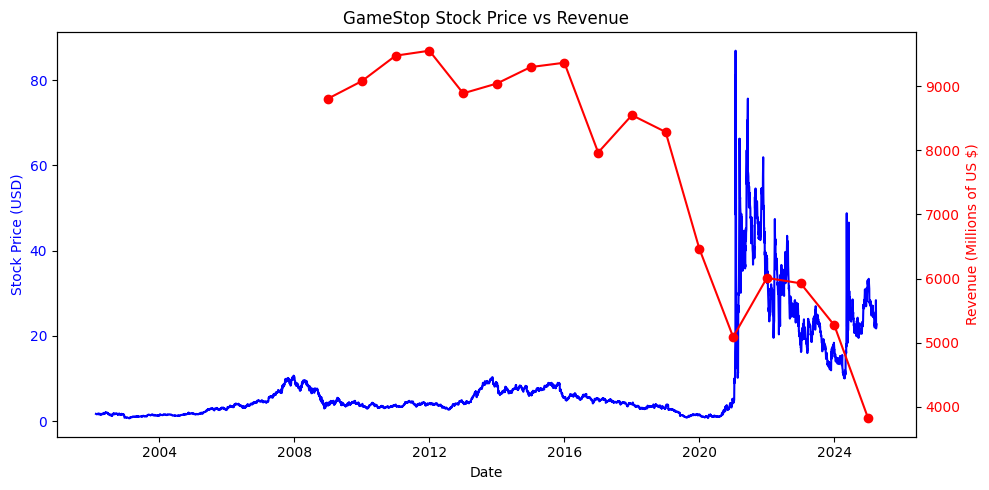

In [12]:
# For Tesla, I presume the variables are defined in the previous cells.  Here, I do everything again so this cell is self-contained 

import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
from io import StringIO
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

# -------------------------
# Step 1: Scrape GameStop Revenue Data
# -------------------------
# Set up Selenium WebDriver (Chrome in this example)
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
# Update URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
driver.get(url)

# Wait for JavaScript to load the content
time.sleep(5)

# Get the rendered HTML and quit the driver
rendered_html = driver.page_source
driver.quit()

# Parse with BeautifulSoup
soup = BeautifulSoup(rendered_html, 'html.parser')
table = soup.find('table', class_='historical_data_table')
if table:
    gamestop_df = pd.read_html(StringIO(str(table)), flavor='lxml')[0]
    # Uncomment the line below to see the first few rows
    # print(gamestop_df.head())
else:
    print("GameStop revenue table not found.")
    exit(1)

# Clean the GameStop revenue data
gamestop_revenue_cleaned = gamestop_df.copy()
gamestop_revenue_cleaned.columns = ['Year', 'Revenue']
gamestop_revenue_cleaned['Revenue'] = gamestop_revenue_cleaned['Revenue'].replace(r'[\$,]', '', regex=True).astype(float)

# -------------------------
# Step 2: Download GameStop Stock Data
# -------------------------
gme = yf.Ticker("GME")
gme_stock = gme.history(period="max")

# -------------------------
# Step 3: Plot the Data
# -------------------------
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot GameStop stock price on primary y-axis
ax1.plot(gme_stock.index, gme_stock['Close'], color='blue', label='Stock Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for revenue data
ax2 = ax1.twinx()

# Convert Year column to datetime (assuming year format like "2025")
years = pd.to_datetime(gamestop_revenue_cleaned['Year'], format='%Y')
ax2.plot(years, gamestop_revenue_cleaned['Revenue'], color='red', marker='o', label='Revenue')
ax2.set_ylabel("Revenue (Millions of US $)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("GameStop Stock Price vs Revenue")
fig.tight_layout()
plt.show()